# Data
* Author: Johannes Maucher
* Last Update: 27.10.2020

**Motivation:**    
One of the central questions before starting a Machine Learning project is 

<center><i>How much data is required?</i></center>

The answer is:
<center><i>It depends!</i></center>

**Subject of this notebook** 

- Describe the main factors, which influence the amount of required data
- Propose guidelines to check if enough data is available 
- Sketch methods to reduce the required amount of data

## General Considerations
* What is T, E, and P?
* **E**xperience is derived from data
* Is labeled data available?
* **How much?** How much instances? How much features?
* How about data distribution?
* Estimate complexity of required model
* What is the quality of the data?

## Type of Data

**numeric vs categorical type; nominal vs ordinal**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/dataTypes.png" width="300" align="center">



**Type of Data:** i.i.d.

<img src="https://maucher.home.hdm-stuttgart.de/Pics/creditWorthiness.png" width="500" align="center">


**Type of Data:** sequential and dependent

<img src="https://maucher.home.hdm-stuttgart.de/Pics/stockData.png" width="500" align="center">


**Type of Data:** Even more challenging dependent data:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/dependantDatatext.png" style="width:600px" align="center">

## Variance and Complexity of Data

In [1]:
import numpy as np
from matplotlib import pyplot as plt
Numpoints=200
s11=1 #standard deviation of x1
s22=1.4 #standard deviation of x2 
rho=0.99 #correlation coefficient between s11 and s22
#Determine covariance matrix from standard deviations
var11=s11**2
var22=s22**2
var12=rho*s11*s22
var21=var12
cov1=np.array(([var11,var12],[var21,var22]))
mean1=np.array([2,3])
population1=np.random.multivariate_normal(mean1,cov1,Numpoints)

rho2=0.5
var12=rho2*s11*s22
var21=var12
cov2=np.array(([var11,var12],[var21,var22]))
population2=np.random.multivariate_normal(mean1,cov2,Numpoints)

### Variance of Data
**Linear Regression Example:**
* Assume that a linear model $$y=f(x)=m*x+b$$ shall be learned from data (parameters $m$ and $b$ must be learned)
* From the entire data population **only a small subset is available for training**
* **Question:** How much training data is required, if data is distributed as in
    * Population 1 (see next cell)
    * Population 2 ?

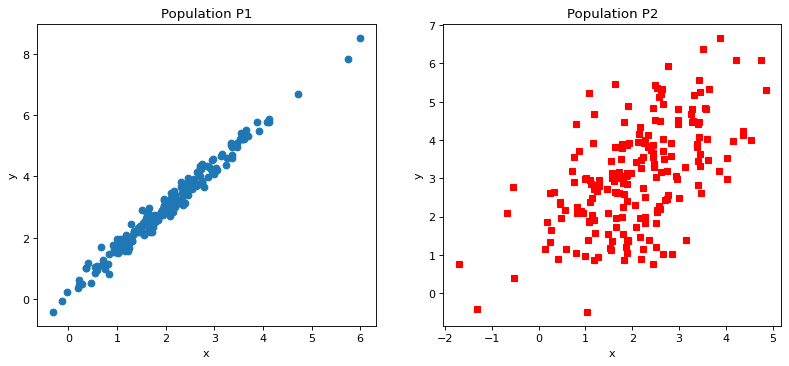

In [2]:
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(population1[:,0],population1[:,1],'o',ms=6)
plt.title("Population P1"),plt.xlabel("x"), plt.ylabel("y")
plt.subplot(1,2,2)
plt.plot(population2[:,0],population2[:,1],'rs',ms=6)
plt.title("Population P2"),plt.xlabel("x"), plt.ylabel("y")
plt.show()

* In the plot on the left variance of data is low $\Rightarrow$ Small number of samples sufficient
* On the right hand side variance is high $\Rightarrow$ Larger number of samples required

### Estimated complexity of model, that shall be learned 
How much data is required for training, in case of
* data set 1 (left side of the follwing cell)
* data set 2 (right side of the follwing cell)?

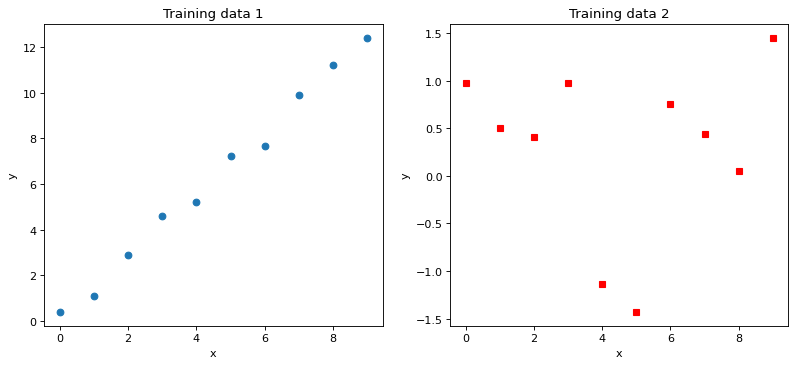

In [3]:
Numpoints=10
x=np.arange(Numpoints)
f1=1.4*x+0.5*np.random.randn(Numpoints)
f2=np.sin(x)+np.cos(2*x+0.2)+0.2*np.random.randn(Numpoints)
plt.figure(num=None, figsize=(12, 5), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(1,2,1)
plt.plot(x,f1,'o',ms=6),plt.xlabel("x"), plt.ylabel("y")
plt.title("Training data 1")
plt.subplot(1,2,2)
plt.plot(x,f2,'rs',ms=6),plt.xlabel("x"), plt.ylabel("y")
plt.title("Training data 2")
plt.show()

**Can we learn a good model from this training data?**

* In the plot on the left a simple linear model seems to be sufficient $\Rightarrow$ Small number of samples
* On the right hand side a more complex model must be learned $\Rightarrow$ Larger number of samples


**Amount of required data depends on ...**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/amountDataNew.png"  width="500" align="center">


* Complexity of Model:
 - in regression: linear function? polynomial function of what degree, radial function...?
 - classification: linear discriminant? polynomial discriminant? ... ? How much classes?
* Variance of data:
 - in regression: data is assumed to be composed of a determinisitic function plus noise. How is the noise-term distributed?
 - in classification:
     - intra-class variance
     - inter-class variance

## How to check if you have enough training data
* What you actually should verify is
<center><font color="red">Does the sample reliably represent the distribution of the entire data-population?</font></center>
* A crucial challenge in this respect is <center><font color="red">Which outliers can be disregarded?</font></center>
* Advice:
<center><font color="red"><i>Consult problem-domain experts</i></font></center>

**How to determine outliers?**
* Visualize data: Scatter-Plots, Box-Plots, ...
* Statistics, e.g. compare 98%-percentil and max()

* Both methods are applicable for 1-or 2-dimensional data (projections)
* For higher-dimensional data: RANSAC, Autoencoder, ...


**Outliers vs specific cases:**
* **True outliers:** Erroneous samples, which shall be removed.
* **Specific cases:** Not erroneous, but far apart from majority of data.
    - Remove them from the training data in order to prevent modelling-distortion
    - Include them and apply a *robust* learning-procedure
    - Apply cascaded approach: First distinguish specific from normal cases, then model them separately
* <font color="red">The less data you have, the harder to detect outlier/specific cases</font>

**Means to determine whether the amount of training is sufficient** 
* Determine **Learningcurve**
    - incrementally increase training data
    - calculate in each step performance on training- and testdata
* Learn model from different training-sample subsets and determine performance variance
* This is actually cross-validation

**Learning Curve for increasing amount of training data:**
<img src="https://maucher.home.hdm-stuttgart.de/Pics/learningcurve.png" style="width:800px" align="center">

As long as the validation accuracy increases with increasing training data, one should go for more training data.

**Cross Validation:**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/CrossValidation.jpg" style="width:800px" align="center">

<img src="https://maucher.home.hdm-stuttgart.de/Pics/crossValidation.png" style="width:800px" align="center">

If the accuracy in the individual iterations of cross validation varies strongly, the amount of labeled data is probably too low.

## If you do not have enough data
* Try to learn a simple modell
* Improve data quality
* Enhance your dataset with **good training samples** $\Rightarrow$ **Active Learning**
* Apply (automatic) data **augmentation** methods
* Reduce the number of features by **feature selection** or **feature extraction**
* Apply pretraining with unsupervised data (Deep Learning)
* Use pretrained models from elsewhere

**Active Learning:**

<img src="https://maucher.home.hdm-stuttgart.de/Pics/activeLearning.png" style="width:600px" align="center">
Source: [B. Settles, Active Learning Survey](http://www.cs.cmu.edu/~10701/slides/Settles_notes.pdf)

## In the case of Unbalanced Data
<img src="https://maucher.home.hdm-stuttgart.de/Pics/churnClassDistribution.png" style="width:600px" align="center">

**Unbalanced Data:**
* Serious (and often underestimated) problem in ML
* How to cope with this problem?
    - undersampling or oversampling data
    - oversampling: Augmentation, e.g. by just duplicating data
    - Consider to train a one-class model for outlier Detection?

## Data and Deep Learning

### Deep Learning doesn't require preprocessing ...

<font color="red">... because it automatically learns meaningful features</font>


<img src="https://maucher.home.hdm-stuttgart.de/Pics/DLfeatureExtraction.png" style="width:800px" align="center">

On an abstract level the architecture of a Deep Neural Network looks like this:

<img src="https://maucher.home.hdm-stuttgart.de/Pics/dnnExtractorClassifier.png" alt="Drawing" style="width: 800px;"/>

The goal of deep learning is to extract meaningful features. The *Extractor-Part* of the network learns from low-level features (e.g. pixel values) at the input of the network a hierarchy of increasingly meaningful features. 


<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnConceptCat.png" alt="Drawing"  width="500">

Image source: [F. Chollet, Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python)

### Deep Learning is superior in the case of large amounts of data (?)

<img src="https://maucher.home.hdm-stuttgart.de/Pics/deepLearningDataAmount.png"  width="500" align="center">

**Some comments on the previous slide:**

* Deep Learning is suitable for learning **complex models**
* In order to learn complex models large amounts of data are required
* Deep Learning is suitable for very high-dimensional data (e.g. images with millions of pixels)
* In this case DL architectures are able to extract layer-by-layer more informative features
* It's not true, that
    - larger amount of data always increases performance
    - Deep Learning is always better in the case of large amount of data


### Deep Neural Networks consist of many layers and neurons ...
... therefore many weights must be learned, what increases the number of training-data exponentially.

<font color="red">**But:**</font>
- in contrast to MLPs not all neurons of one layer are connected with all neurons of the neighbouring layer
- Many connections share the same weight-sets
- ...


### Deep Neural Networks can be pretrained with unlabeled data
* Some Neural Networks can be pretrained with unlabeled data, e.g.
- (Stacked) Autoencoder
- Deep Belief Networks
* After pretraining these networks are able to extract meaningful features
* On top of the pretrained stack a classifier can be trained with a low number of application specific labeled data

**Autoencoders** are trained such that they can reconstruct their input $\mathbf{x}$ from the latent representation $\mathbf{y}$.  
<img src="https://maucher.home.hdm-stuttgart.de/Pics/autoencoder.png" style="width:800px" align="center">

### Pretrained Neural Networks can be downloaded and finetuned

* Many pretrained Deep Neural nets can be downloaded, e.g. from
[Keras](https://keras.io/api/applications/) and [Pytorch](https://pytorch.org/docs/stable/torchvision/models.html).
* These nets are proven to **extract meaningful features** in the domain of their training-data
* Usually the **topmost layers (classifiers) are removed** and replaced with an untrained classifier network
* Then only a **small amount of domain-specific labeled training data** is required to train these classifier layers
* Optionally also fine-tuning of other layers

### Concluding Remark

$\Rightarrow$ <center><font color="red"><i>Before applying Deep Learning you should understand your data and your task. In order to do so application of simple conventional approaches may help</i></font></center> 

<img src="https://maucher.home.hdm-stuttgart.de/Pics/kanonenaufspatzen.jpg" style="width:600px" align="center">